<H1>Лаба №3</H1>

Рассчитаем Gini index в России. Gini index -- это показатель неравенства доходов. Индекс варьируется от 0 до 1, где 0 означает полное равенство, а 1 — полное неравенство.

In [61]:
import pandas as pd
import numpy as np

In [62]:
datafile = pd.read_csv("gini_by_country.csv")
datafile

,country_code,country_name,year,value
0,AGO,Angola,2000,52.0
1,AGO,Angola,2008,42.7
2,AGO,Angola,2018,51.3
3,ALB,Albania,1996,27.0
4,ALB,Albania,2002,31.7
...,...,...,...,...
1891,ZMB,Zambia,2010,55.6
1892,ZMB,Zambia,2015,57.1
1893,ZWE,Zimbabwe,2011,43.2
1894,ZWE,Zimbabwe,2017,44.3


In [63]:
rfDF = datafile[datafile["country_name"]== "Russian Federation"]

Удалим все ненужные строки

In [64]:
rfDF = rfDF.drop(columns=['country_code', 'country_name'])

<Axes: xlabel='year'>

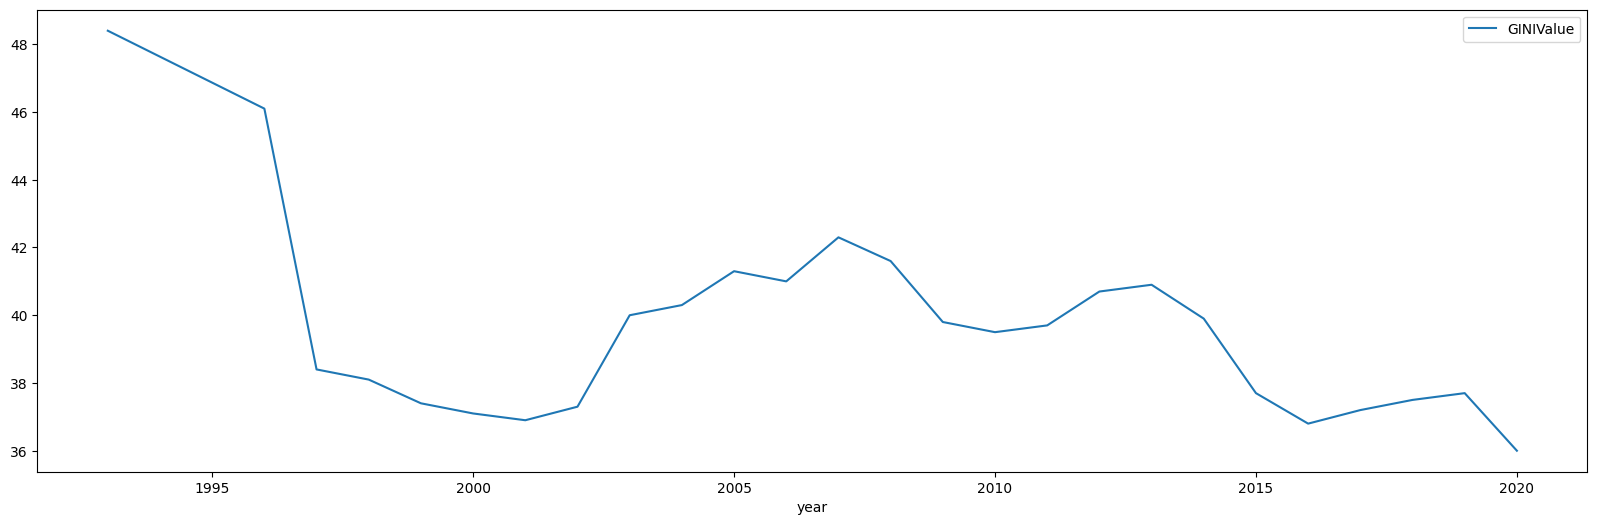

In [65]:
rfDF = rfDF.rename(columns={'value': 'GINIValue'})
rfDF.plot(x='year', y='GINIValue', figsize = (20, 6))

Перед обучением разделим данные на тестовые и тренировочные:

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
X_train, X_test, y_train, y_test = train_test_split(rfDF['year'], rfDF['GINIValue'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

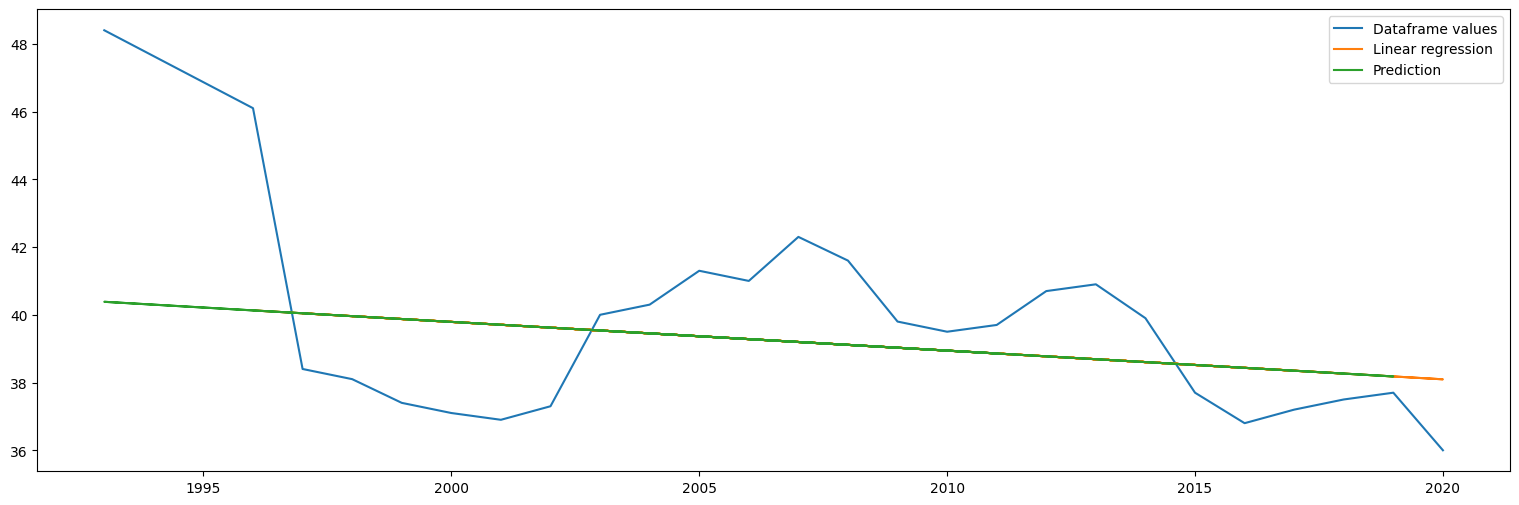

In [68]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(rfDF['year'], rfDF['GINIValue'], label='Dataframe values')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
ax.plot(X_test, model.predict(X_test), label='Prediction')
ax.legend()
plt.show()

Посчитаем метрики MAE и MSE

In [69]:
from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(
    model.predict(X_test), y_test)
)

MAE = 2.0614623627228745


In [70]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error( model.predict(X_test), y_test)

print('MSE = %s' % mse)

MSE = 11.51438976963189


<H1>Лаба №4</H1>

In [71]:
from catboost import CatBoostRegressor

In [72]:
catModel = CatBoostRegressor(iterations=2500,  # Количество итераций
                          learning_rate=0.1,  # Скорость обучения
                          depth=6,  # Глубина дерева
                          random_state=345)  # Задаем случайное начальное состояние для воспроизводимости

catModel.fit(X_train, y_train, verbose=100)


y_pred = catModel.predict(X_test)



0:	learn: 2.3821902	total: 1.12ms	remaining: 2.8s
100:	learn: 0.3360289	total: 11.9ms	remaining: 282ms
200:	learn: 0.0575160	total: 26.9ms	remaining: 308ms
300:	learn: 0.0167510	total: 41ms	remaining: 300ms
400:	learn: 0.0055524	total: 51.4ms	remaining: 269ms
500:	learn: 0.0017991	total: 63.7ms	remaining: 254ms
600:	learn: 0.0006014	total: 74ms	remaining: 234ms
700:	learn: 0.0001945	total: 83.8ms	remaining: 215ms
800:	learn: 0.0000675	total: 93.8ms	remaining: 199ms
900:	learn: 0.0000223	total: 104ms	remaining: 185ms
1000:	learn: 0.0000076	total: 127ms	remaining: 191ms
1100:	learn: 0.0000028	total: 138ms	remaining: 175ms
1200:	learn: 0.0000011	total: 150ms	remaining: 162ms
1300:	learn: 0.0000004	total: 165ms	remaining: 152ms
1400:	learn: 0.0000002	total: 175ms	remaining: 137ms
1500:	learn: 0.0000001	total: 186ms	remaining: 124ms
1600:	learn: 0.0000000	total: 196ms	remaining: 110ms
1700:	learn: 0.0000000	total: 207ms	remaining: 97.1ms
1800:	learn: 0.0000000	total: 217ms	remaining: 84.1ms

In [73]:
mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 2.291668192546773


In [74]:
print("MAE = %s" % mean_absolute_error(
    y_pred, y_test)
)

MAE = 1.1166667938229782


In [75]:
import lightgbm as lgb

In [76]:
lightBmModel = lgb.LGBMRegressor(num_leaves=31,  # Количество листьев в дереве
                          learning_rate=0.1,  # Скорость обучения
                          n_estimators=100,  # Количество деревьев
                          random_state=42)  # Задаем случайное начальное состояние для воспроизводимости
lightBmModel.fit(X_train, y_train, verbose=10)  # Обучение модели с выводом прогресса на каждой 10-й итерации

# Прогнозирование на тестовом наборе данных
y_pred = lightBmModel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [77]:
mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 15.674791666666659


In [78]:
print("MAE = %s" % mean_absolute_error(
    y_pred, y_test)
)

MAE = 2.5333333333333328


Как видно, по результатам сравнения, CatBoost показывает себя лучше на нашей выборке данных. Сравним теперь CatBoost и xgboost

In [79]:
import xgboost as xgb
# Создание объекта DMatrix для обучающей и тестовой выборок
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Определение параметров модели
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'min_child_weight': 1,
    'seed': 42
}

# Обучение модели XGBoost
num_rounds = 100
xgbModel = xgb.train(params, dtrain, num_rounds)

# Прогнозирование на тестовой выборке
y_pred = xgbModel.predict(dtest)

mse = mean_squared_error(y_pred, y_test)

print('MSE = %s' % mse)

MSE = 2.462834236362154


In [80]:
print("MAE = %s" % mean_absolute_error(
    y_pred, y_test)
)

MAE = 1.4283837636311851


Вывод: на этом датасете xgboost показывает наилучший результат.